In [1]:
!ls

006_prbc_select_icustay_id.ipynb
007_Patients_include_exclude.ipynb
008_LABEVENTS_280_to_50_ITEMID.ipynb
009_CHARTEVENT_LABEVENTS_MERGE.ipynb
010_time_window_4hours_ML_test.html
010_time_window_4hours_ML_test.ipynb
011_missing_indicator.ipynb
012_MODEL_ML.html
012_MODEL_ML.ipynb
013_MODEL_for_OUTPUT.html
013_MODEL_for_OUTPUT.ipynb
discription_mimic
duhyeuk
inputevent_mv.ipynb
Inputevetn_mv_for_final.ipynb
mimic_filtering.ipynb
MIMIC3
Normalization_Mean_ValueNum.ipynb
reference_paper
reference_paper.zip
sungbin


In [2]:
import numpy as np
import pandas as pd


In [3]:
prbc_cv = pd.read_csv('./sungbin/prbc_cv.csv')
prbc_mv = pd.read_csv('./sungbin/prbc_mv.csv')


C:\Users\konyang\sungbin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
prbc_cv

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,8484363,30417,130724.0,278238.0,2153-01-03 03:00:00,30179,NaN,ml,NaN,NaN,...,4232225,1620312,NaN,1.0,NaN,cc,Intravenous,NaN,NaN,NaN
1,8484364,30417,130724.0,278238.0,2153-01-03 07:00:00,30179,9.0,ml,NaN,NaN,...,2838988,1620312,Stopped,NaN,NaN,cc,Intravenous,NaN,NaN,NaN
2,8484365,30417,130724.0,278238.0,2153-01-15 13:45:00,30179,NaN,ml,NaN,NaN,...,490466,1620312,NaN,1.0,NaN,cc,Intravenous,NaN,NaN,NaN
3,8484366,30417,130724.0,278238.0,2153-01-15 15:15:00,30179,5.0,ml,NaN,NaN,...,3959813,1620312,NaN,NaN,NaN,cc,Intravenous,NaN,NaN,NaN
4,8484367,30417,130724.0,278238.0,2153-01-15 16:00:00,30179,2.0,ml,NaN,NaN,...,8862726,1620312,NaN,NaN,NaN,cc,Intravenous,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66304,6280182,29484,104022.0,216918.0,2126-01-16 19:00:00,30004,370.0,ml,NaN,NaN,...,2941212,3327587,NaN,NaN,NaN,ml,Intravenous Push,NaN,NaN,NaN
66305,8792651,11881,168185.0,274914.0,2136-12-21 12:00:00,30004,0.0,ml,NaN,NaN,...,7491529,7491529,NaN,1.0,211.0,ml,Intravenous Push,80.0,ml/hr,NaN
66306,8792652,11881,168185.0,274914.0,2136-12-21 13:00:00,30004,80.0,ml,NaN,NaN,...,11029484,7491529,NaN,NaN,211.0,ml,Intravenous Push,80.0,ml/hr,NaN
66307,8792653,11881,168185.0,274914.0,2136-12-21 14:00:00,30004,80.0,ml,NaN,NaN,...,3180239,7491529,NaN,NaN,211.0,ml,Intravenous Push,80.0,ml/hr,NaN


In [5]:
uniq = prbc_cv[['HADM_ID','ICUSTAY_ID']].drop_duplicates(subset=['HADM_ID', 'ICUSTAY_ID'], keep='last')
uniq

,HADM_ID,ICUSTAY_ID
42,137736.0,200545.0
61,152888.0,235316.0
62,126781.0,261313.0
86,192854.0,273055.0
121,185368.0,237061.0
...,...,...
66296,157708.0,263005.0
66298,NaN,226767.0
66300,157262.0,254967.0
66304,104022.0,216918.0


In [6]:
# prbc_hadm_cv = prbc_cv[['HADM_ID','ICUSTAY_ID']]
# prbc_hadm_cv

In [6]:
diag = pd.read_csv('./MIMIC3/DIAGNOSES_ICD.csv')
diag

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [8]:
cv_diag = pd.merge(uniq, diag, on='HADM_ID', how='left')
cv_diag

,HADM_ID,ICUSTAY_ID,ROW_ID,SUBJECT_ID,SEQ_NUM,ICD9_CODE
0,137736.0,200545.0,135817.0,12031.0,5.0,7707
1,137736.0,200545.0,135818.0,12031.0,6.0,7742
2,137736.0,200545.0,135819.0,12031.0,7.0,7797
3,137736.0,200545.0,135820.0,12031.0,8.0,7757
4,137736.0,200545.0,135821.0,12031.0,9.0,76524
...,...,...,...,...,...,...
131053,168185.0,274914.0,133982.0,11881.0,16.0,25000
131054,168185.0,274914.0,133983.0,11881.0,17.0,60000
131055,168185.0,274914.0,133984.0,11881.0,18.0,53081
131056,168185.0,274914.0,133985.0,11881.0,19.0,78791


In [9]:
cv_diag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131058 entries, 0 to 131057
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HADM_ID     131042 non-null  float64
 1   ICUSTAY_ID  130803 non-null  float64
 2   ROW_ID      131042 non-null  float64
 3   SUBJECT_ID  131042 non-null  float64
 4   SEQ_NUM     131040 non-null  float64
 5   ICD9_CODE   131040 non-null  object 
dtypes: float64(5), object(1)
memory usage: 7.0+ MB


In [10]:
# 11,499
# 131,058
cv_diag.ICD9_CODE.value_counts()[:20]

4019     4169
4280     3504
42731    3374
41401    3228
5849     2152
25000    1963
51881    1941
2851     1685
5990     1666
2720     1470
2859     1174
486      1127
41071    1089
99592    1073
0389     1057
496      1017
5185      963
5070      939
9971      895
2762      892
Name: ICD9_CODE, dtype: int64

In [11]:
'''
4019     Unspecified essential hypertension
4280     Congestive heart failure
42731    Atrial fibrillation
41401    Coronary atherosclerosis of native coronary artery
5849     Acute kidney failure, unspecified (billable)
25000    DIABETES MELLITUS
51881    ACUTE RESPIRATRY FAILURE
2851     Acute posthemorrhagic anemia
5990     Urinary tract infection, site not specified
2720     Pure hypercholesterolemia -
2859     Anemia
486      Pneumonia, organism unspecified.
41071    Subendocardial infarction
99592    SEVERE SEPSIS
0389     Unspecified septicemia
496      Chronic airway obstruction, not elsewhere classified
5185      Pulmonary insufficiency following trauma and surgery
5070     FOOD/VOMIT PNEUMONITIS
9971      THERAPEU PLASMAPHERESIS
2762      Cervical spondylosis without myelopathy.
'''

'\n4019     Unspecified essential hypertension\n4280     Congestive heart failure\n42731    Atrial fibrillation\n41401    Coronary atherosclerosis of native coronary artery\n5849     Acute kidney failure, unspecified (billable)\n25000    DIABETES MELLITUS\n51881    ACUTE RESPIRATRY FAILURE\n2851     Acute posthemorrhagic anemia\n5990     Urinary tract infection, site not specified\n2720     Pure hypercholesterolemia -\n2859     Anemia\n486      Pneumonia, organism unspecified.\n41071    Subendocardial infarction\n99592    SEVERE SEPSIS\n0389     Unspecified septicemia\n496      Chronic airway obstruction, not elsewhere classified\n5185      Pulmonary insufficiency following trauma and surgery\n5070     FOOD/VOMIT PNEUMONITIS\n9971      THERAPEU PLASMAPHERESIS\n2762      Cervical spondylosis without myelopathy.\n'

In [7]:
drg = pd.read_csv('./MIMIC3/DRGCODES.csv')


In [9]:
drg

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
...,...,...,...,...,...,...,...,...
125552,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN
125553,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0
125554,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0
125555,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN


In [11]:
DRG_cv = pd.merge(uniq, drg, on='HADM_ID', how='left')
DRG_cv

,HADM_ID,ICUSTAY_ID,ROW_ID,SUBJECT_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,137736.0,200545.0,38502.0,12031.0,HCFA,385.0,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN
1,137736.0,200545.0,38503.0,12031.0,APR,6024.0,"Neonate, Birthwt 1000-1249G w/ Resp Dist Synd/...",4.0,2.0
2,152888.0,235316.0,10856.0,23140.0,HCFA,385.0,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN
3,126781.0,261313.0,15241.0,23140.0,HCFA,387.0,PREMATURITY WITH MAJOR PROBLEMS,NaN,NaN
4,192854.0,273055.0,15912.0,14479.0,HCFA,387.0,PREMATURITY WITH MAJOR PROBLEMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17972,104022.0,216918.0,54816.0,29484.0,APR,1753.0,Percutaneous Cardiovascular Procedures w/o AMI,3.0,2.0
17973,104022.0,216918.0,54817.0,29484.0,APR,1753.0,Percutaneous Cardiovascular Procedures w/o AMI,3.0,2.0
17974,104022.0,216918.0,54818.0,29484.0,MS,248.0,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN
17975,168185.0,274914.0,31252.0,11881.0,HCFA,87.0,PULMONARY EDEMA & RESPIRATORY FAILURE,NaN,NaN


In [12]:
DRG_cv.DESCRIPTION.value_counts()[:20]

CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROC WITHOUT CARDIAC CATHETER                                                                                       552
GASTROINTESTINAL HEMORRHAGE WITH COMPLICATIONS, COMORBIDITIES                                                                                                  547
CORONARY BYPASS WITH CARDIAC CATHETER                                                                                                                          435
Cardiac Valve Procedures w/o Cardiac Catheterization                                                                                                           429
Septicemia & Disseminated Infections                                                                                                                           349
Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure                                                                                             346
MAJOR CARDIOVASCULAR P

In [15]:
uniq_mv = prbc_mv[['HADM_ID','ICUSTAY_ID']].drop_duplicates(subset=['HADM_ID', 'ICUSTAY_ID'], keep='last')
uniq_mv

,HADM_ID,ICUSTAY_ID
0,120396,243526.0
1,181163,267692.0
4,117266,207673.0
9,159085,204976.0
12,127805,298189.0
...,...,...
26833,125185,297928.0
26834,129176,237498.0
26835,178038,230047.0
26836,144997,221224.0


In [16]:
DRG_mv = pd.merge(uniq_mv, drg, on='HADM_ID', how='left')
DRG_mv

,HADM_ID,ICUSTAY_ID,ROW_ID,SUBJECT_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,120396,243526.0,47054,30354,APR,54,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
1,120396,243526.0,47055,30354,APR,54,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
2,120396,243526.0,47056,30354,MS,4,"TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NE...",NaN,NaN
3,181163,267692.0,47087,18082,APR,9504,Extensive Procedure Unrelated To Principal Dia...,4.0,4.0
4,181163,267692.0,47088,18082,APR,9504,Extensive Procedure Unrelated To Principal Dia...,4.0,4.0
...,...,...,...,...,...,...,...,...,...
20728,144997,221224.0,118390,51045,APR,3013,Hip Joint Replacement,3.0,3.0
20729,144997,221224.0,118391,51045,MS,466,REVISION OF HIP OR KNEE REPLACEMENT W MCC,NaN,NaN
20730,154799,256370.0,123159,53919,APR,1652,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,2.0,3.0
20731,154799,256370.0,123160,53919,APR,1652,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,2.0,3.0


In [17]:
DRG_mv.DESCRIPTION.value_counts()[:10]

Cardiac Valve Procedures w/o Cardiac Catheterization                     1045
Septicemia & Disseminated Infections                                      740
Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure        602
Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure         495
Other & Unspecified Gastrointestinal Hemorrhage                           466
Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure     462
Cardiac Valve Procedures w/ Cardiac Catheterization                       438
Peptic Ulcer & Gastritis                                                  422
Major Small & Large Bowel Procedures                                      334
Infectious & Parasitic Diseases Including HIV W O.R. Procedure            328
Name: DESCRIPTION, dtype: int64

## ICD로본 진단명 + pRBC수혈 환자

In [20]:
icd = pd.read_csv('MIMIC3/DIAGNOSES_ICD.csv')
icd

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [70]:
icd_mv = pd.merge(uniq_mv, icd, on='HADM_ID', how='left')
icd_mv

,HADM_ID,ICUSTAY_ID,ROW_ID,SUBJECT_ID,SEQ_NUM,ICD9_CODE
0,120396,243526.0,348591,30354,1.0,51881
1,120396,243526.0,348592,30354,2.0,486
2,120396,243526.0,348593,30354,3.0,5990
3,120396,243526.0,348594,30354,4.0,5845
4,120396,243526.0,348595,30354,5.0,2760
...,...,...,...,...,...,...
123661,144997,221224.0,429373,51045,22.0,42731
123662,154799,256370.0,443009,53919,1.0,41011
123663,154799,256370.0,443010,53919,2.0,2851
123664,154799,256370.0,443011,53919,3.0,41401


In [72]:
icd_mv.ICD9_CODE.value_counts()[:10]

4019     2778
42731    2217
2851     2075
2724     1990
4280     1883
41401    1839
5849     1765
51881    1438
25000    1362
5990     1142
Name: ICD9_CODE, dtype: int64

In [ ]:
'''
4019     Unspecified essential hypertension
42731    Atrial fibrillation
2851     Acute posthemorrhagic anemia
2724      Other and unspecified hyperlipidemia
4280     Congestive heart failure, unspecified
41401    Coronary atherosclerosis of native coronary artery 
5849     Acute kidney failure ICD 9
51881    Acute respiratry failure (Acute respiratory failure) 
25000    DIABETES MELLITUS WITHOUT MENTION OF COMPLICATION, TYPE II OR UNSPECIFIED TYPE
5990     Urinary tract infection, site not specified -
'''

## Subject ID에 몇번의 ICUSTAYS_ID를 가지는 것인가
- First ICU만 뽑아내야 하는 가?

In [22]:
icu = pd.read_csv('MIMIC3/ICUSTAYS.csv')
icu

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [24]:
len(icu['ICUSTAY_ID'].unique())

61532

In [33]:
distr = icu[['SUBJECT_ID','HADM_ID','ICUSTAY_ID']].groupby(['SUBJECT_ID']).count()

HADM_ID  ICUSTAY_ID
1        1             37721
2        2              5796
3        3              1619
4        4               650
5        5               300
6        6               151
7        7                86
8        8                44
9        9                29
10       10               19
11       11               15
12       12               11
13       13                8
15       15                6
14       14                4
16       16                2
17       17                2
18       18                2
21       21                2
25       25                2
20       20                1
22       22                1
23       23                1
31       31                1
35       35                1
38       38                1
41       41                1
dtype: int64

In [45]:
len(icu['SUBJECT_ID'].unique())

46476

In [52]:
count = icu[['SUBJECT_ID','HADM_ID','ICUSTAY_ID']].groupby(['SUBJECT_ID']).count()
count.describe()

,HADM_ID,ICUSTAY_ID
count,46476.000000,46476.000000
mean,1.323952,1.323952
std,0.996007,0.996007
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,41.000000,41.000000


1     37721
2      5796
3      1619
4       650
5       300
6       151
7        86
8        44
9        29
10       19
11       15
12       11
13        8
15        6
14        4
16        2
17        2
18        2
21        2
25        2
41        1
38        1
35        1
20        1
22        1
23        1
31        1
Name: ICUSTAY_ID, dtype: int64


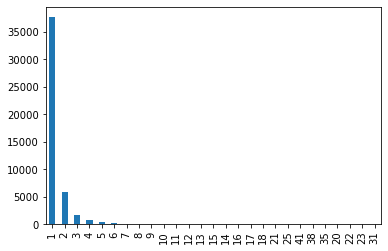

In [58]:
count['ICUSTAY_ID'].value_counts().plot.bar()
# 대부분은 한 환자당 icu입원이 1번이지만,
# 가장 많게는 41번 icu입원한 경우도 있다.
print(count['ICUSTAY_ID'].value_counts())

In [59]:
icu

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [61]:
icu.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [68]:
sorted_icu = icu.sort_values(by=['INTIME'], ascending=True)
sorted_icu
drop_icu = sorted_icu.drop_duplicates(subset=['SUBJECT_ID'], keep='first')
drop_icu

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
52387,55779,82574,118464,202134,metavision,MICU,MICU,23,52,2100-06-07 20:00:22,2100-06-08 14:59:31,0.7911
37523,36950,29156,161773,293407,carevue,MICU,MICU,52,52,2100-06-09 01:39:43,2100-06-18 22:43:37,9.8777
12845,15324,12001,173927,222148,carevue,SICU,SICU,23,23,2100-06-14 04:56:39,2100-06-18 19:49:38,4.6201
24557,26720,21081,159656,293525,carevue,MICU,MICU,15,15,2100-06-14 14:33:55,2100-06-15 17:36:37,1.1269
40619,40452,32096,158366,240498,carevue,TSICU,TSICU,14,14,2100-06-22 06:34:52,2100-06-24 13:35:56,2.2924
...,...,...,...,...,...,...,...,...,...,...,...,...
51188,49682,64520,137247,262918,metavision,CSRU,CSRU,15,15,2204-01-23 18:59:44,2204-01-24 20:40:28,1.0700
9666,8814,6942,172673,240447,carevue,CCU,CCU,7,7,2204-02-21 16:11:08,2204-02-23 21:09:02,2.2069
54735,56882,86042,191143,255110,metavision,SICU,SICU,57,57,2205-10-24 21:53:20,2205-10-28 12:32:31,3.6105
51943,57611,88420,123159,282256,metavision,CSRU,CSRU,12,12,2206-04-17 18:43:41,2206-04-18 12:05:47,0.7237


In [69]:
drop_icu.to_csv('./sungbin/first_icu.csv', index=False)

## DRG에 있는 환자는 몇명인가


In [73]:
drg

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
...,...,...,...,...,...,...,...,...
125552,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN
125553,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0
125554,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0
125555,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN


In [74]:
len(drg['SUBJECT_ID'].unique())

46511

In [75]:
# 여기서 잠깐, patients.csv도 subject_ID몇명인지 확인해보자
pats = pd.read_csv('MIMIC3/PATIENTS.csv')
pats

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [76]:
len(pats.SUBJECT_ID.unique()) # 총 subject id개수 46520명

46520

In [ ]:
# 그러면, DRG는 대부분환자를 커버하고 있음 46511 - 무방함.
# 일단 first_icu 환자의 HADM + DRG row 


In [80]:
first_icu = drop_icu[['HADM_ID','ICUSTAY_ID']]
first_icu_DRG = pd.merge(drg, first_icu, on='HADM_ID', how='left')
first_icu_DRG

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN,258915.0
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,260176.0
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN,236527.0
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,245993.0
...,...,...,...,...,...,...,...,...,...
125552,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN,235241.0
125553,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
125554,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
125555,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN,213017.0


In [86]:
DRG_firstICU = first_icu_DRG[first_icu_DRG['ICUSTAY_ID'].notnull()]
DRG_firstICU

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN,258915.0
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,260176.0
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN,236527.0
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,245993.0
5,347,23705,154221,HCFA,385,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN,211993.0
...,...,...,...,...,...,...,...,...,...
125552,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN,235241.0
125553,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
125554,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
125555,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN,213017.0


In [84]:
len(first_icu_DRG[first_icu_DRG['ICUSTAY_ID'].notnull()].SUBJECT_ID.unique())

46469

In [87]:
DRG_firstICU.to_csv('sungbin/DRG_firstICU.csv', index=False)

## 3. pRBC가장 많이 받는 진단명 순위 필터링

In [91]:
uniq_mv = prbc_mv[['HADM_ID','ICUSTAY_ID']].drop_duplicates(subset=['HADM_ID', 'ICUSTAY_ID'], keep='last')
uniq_mv

,HADM_ID,ICUSTAY_ID
0,120396,243526.0
1,181163,267692.0
4,117266,207673.0
9,159085,204976.0
12,127805,298189.0
...,...,...
26833,125185,297928.0
26834,129176,237498.0
26835,178038,230047.0
26836,144997,221224.0


In [92]:
DRG_mv = pd.merge(uniq_mv, drg, on='HADM_ID', how='left')
DRG_mv

,HADM_ID,ICUSTAY_ID,ROW_ID,SUBJECT_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,120396,243526.0,47054,30354,APR,54,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
1,120396,243526.0,47055,30354,APR,54,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
2,120396,243526.0,47056,30354,MS,4,"TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NE...",NaN,NaN
3,181163,267692.0,47087,18082,APR,9504,Extensive Procedure Unrelated To Principal Dia...,4.0,4.0
4,181163,267692.0,47088,18082,APR,9504,Extensive Procedure Unrelated To Principal Dia...,4.0,4.0
...,...,...,...,...,...,...,...,...,...
20728,144997,221224.0,118390,51045,APR,3013,Hip Joint Replacement,3.0,3.0
20729,144997,221224.0,118391,51045,MS,466,REVISION OF HIP OR KNEE REPLACEMENT W MCC,NaN,NaN
20730,154799,256370.0,123159,53919,APR,1652,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,2.0,3.0
20731,154799,256370.0,123160,53919,APR,1652,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,2.0,3.0


In [95]:
len(DRG_mv.HADM_ID.unique())

6553

In [90]:
DRG_mv.DESCRIPTION.value_counts()[:20]

Cardiac Valve Procedures w/o Cardiac Catheterization                       1045
Septicemia & Disseminated Infections                                        740
Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure          602
Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure           495
Other & Unspecified Gastrointestinal Hemorrhage                             466
Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure       462
Cardiac Valve Procedures w/ Cardiac Catheterization                         438
Peptic Ulcer & Gastritis                                                    422
Major Small & Large Bowel Procedures                                        334
Infectious & Parasitic Diseases Including HIV W O.R. Procedure              328
G.I. HEMORRHAGE W CC                                                        309
Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure     304
Other Vascular Procedures               

In [98]:
DRG_mv.DRG_CODE.value_counts()

7204    673
1633    457
44      431
7104    315
378     309
       ... 
662       1
582       1
230       1
965       1
16        1
Name: DRG_CODE, Length: 926, dtype: int64

In [99]:
DRG_mv.DRG_CODE.value_counts().describe()

count    926.000000
mean      22.389849
std       51.355805
min        1.000000
25%        2.000000
50%        6.000000
75%       19.000000
max      673.000000
Name: DRG_CODE, dtype: float64

<AxesSubplot:>

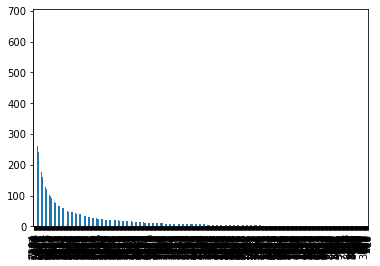

In [100]:
DRG_mv.DRG_CODE.value_counts().plot.bar()

<BarContainer object of 926 artists>

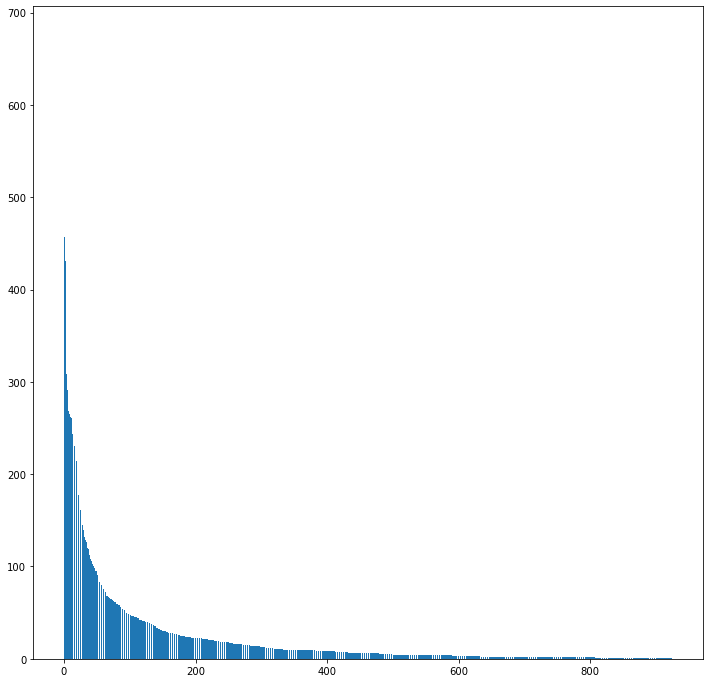

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.bar(np.arange(926),DRG_mv.DRG_CODE.value_counts().values)

In [115]:
DRG_mv.DESCRIPTION.value_counts()[60:120]

CORONARY BYPASS W/O CARDIAC CATH W MCC                                  83
Major O.R. Procedures For Lymphatic/Hematopietic/Other Neoplasms        78
Other Pneumonia                                                         77
OTHER O.R. PROCEDURES FOR MULTIPLE SIGNIFICANT TRAUMA W MCC             75
PANCREAS, LIVER & SHUNT PROCEDURES W MCC                                73
Moderately Extensive Procedure Unrelated To Principal Diagnosis         70
Major Gastrointestinal & Peritoneal Infections                          70
Major Hematologic/Immunologic Diag Exc Sickle Cell Crisis & Coagul      70
EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W MCC         69
CIRRHOSIS & ALCOHOLIC HEPATITIS W MCC                                   68
Spinal Procedures                                                       68
CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W CC            68
Bone Marrow Transplant                                                  64
Other Cardiothoracic Proc

Septicemia & Disseminated Infections 
SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC 
SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                                  

Other & Unspecified Gastrointestinal Hemorrhage 
G.I. HEMORRHAGE W CC  
G.I. HEMORRHAGE W MCC  


Peptic Ulcer & Gastritis 
Other Digestive System Diagnoses
Diverticulitis & Diverticulosis

Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure       
Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure     
ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R
Respiratory System Diagnosis w/ Ventilator Support 96+ Hours
TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.               

In [ ]:
'''
Septicemia & Disseminated Infections                                        740

Other & Unspecified Gastrointestinal Hemorrhage                             466
Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure       462 ??


Peptic Ulcer & Gastritis                                                    422

Infectious & Parasitic Diseases Including HIV W O.R. Procedure              328
G.I. HEMORRHAGE W CC                                                        309
Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure     304  ??


ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.         291

G.I. HEMORRHAGE W MCC                                                       262
Other Digestive System Diagnoses                                            243

SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                          223


Respiratory System Diagnosis w/ Ventilator Support 96+ Hours                200

Diverticulitis & Diverticulosis                                             188


INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                      177




TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.               139
Hepatic Coma & Other Major Acute Liver Disorders                            132

SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                                  129


--------------------------------------------------------------------------------

Renal Failure                                                               112


Alcoholic Liver Disease                                                     108
Heart Failure                                                               100
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS                  98

Post-Op,Post-Trauma, Other Device Infections W O.R. Procedure                97
Acute Leukemia                                                               96

Other Anemia & Disorders Of Blood & Blood Forming Organs                     95

Other Disorders Of The Liver                                                 94
Major Esophageal Disorders                                                   92
DISORDERS OF LIVER EXCEPT MALIG,CIRR,ALC HEPA W MCC                          91



Other Pneumonia                                                         77


Major Gastrointestinal & Peritoneal Infections                          70
Major Hematologic/Immunologic Diag Exc Sickle Cell Crisis & Coagul      70

CIRRHOSIS & ALCOHOLIC HEPATITIS W MCC                                   68


Acute Myocardial Infarction                                             62
Digestive Malignancy                                                    62



Major Respiratory Infections & Inflammations                            59



Cardiac Catheterization w/ Circ Disord Exc Ischemic Heart Disease       56
Lymphoma & Non-acute Leukemia                                           56
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT <96 HOURS             55
Cardiac Defibrillator & Heart Assist Anomaly                            54
Head Trauma w/ Coma > 1 Hr or Hemorrhage                                54
Other Circulatory System Diagnoses                                      54
OTHER CIRCULATORY SYSTEM DIAGNOSES W MCC                                54

Post-Operative, Post-Traumatic, Other Device Infections                 53
Disorders of the Gallbladder & Biliary Tract                            50
Pulmonary Edema & Respiratory Failure                                   50
RENAL FAILURE W MCC                                                     49
Other Circulatory System Procedures                                     48
Other Hepatobiliary, Pancreas & Abdominal Procedures                    48
ACUTE LEUKEMIA W/O MAJOR O.R. PROCEDURE W MCC                           46
Peripheral & Other Vascular Disorders                                   46
MAJOR CHEST PROCEDURES W MCC                                            46
OTHER O.R. PROCEDURES FOR INJURIES W MCC                                45
MAJOR CARDIOVASC PROCEDURES W/O MCC                                     44
Hip & Femur Procedures for Non-Trauma Except Joint Replacement          44
Disorders of Pancreas Except Malignancy                                 44
Malfunction, Reaction & Comp of Cardiac or Vasc Device or Proc          42
HEART FAILURE & SHOCK W MCC                                             42
Malignancy of Hepatobiliary System & Pancreas                           42
OTHER RESP SYSTEM O.R. PROCEDURES W MCC                                 41
COMPLICATIONS OF TREATMENT W MCC                                        40
LIMB REATTACHMENT, HIP & FEMUR PROC FOR MULTIPLE SIGNIFICANT TRAUMA     40
COMBINED ANTERIOR/POSTERIOR SPINAL FUSION W CC                          40
Kidney & Urinary Tract Procedures for Nonmalignancy                     40
PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS    40
COMPLICATIONS OF TREATMENT W CC                                         39
HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W MCC                         39
OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC                                  39
Knee & Lower Leg Procedures Except Foot                                 38
Intracranial Hemorrhage                                                 38
OTHER O.R. PROCEDURES FOR MULTIPLE SIGNIFICANT TRAUMA W CC              37
Other Esophageal Disorders                                              36
'''

In [118]:
DRG_mv[DRG_mv.DESCRIPTION == 'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure']

,HADM_ID,ICUSTAY_ID,ROW_ID,SUBJECT_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
96,154148,209103.0,53012,31123,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
97,154148,209103.0,53013,31123,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
379,147621,294198.0,62051,32739,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
408,144855,237522.0,62460,78518,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
409,144855,237522.0,62461,78518,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
...,...,...,...,...,...,...,...,...,...
20548,112203,253962.0,123989,66067,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0
20568,136366,214560.0,123705,64137,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,3.0
20569,136366,214560.0,123706,64137,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,3.0
20661,168670,260223.0,124858,40548,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0


In [116]:
DRG_cv

,HADM_ID,ICUSTAY_ID,ROW_ID,SUBJECT_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,137736.0,200545.0,38502.0,12031.0,HCFA,385.0,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN
1,137736.0,200545.0,38503.0,12031.0,APR,6024.0,"Neonate, Birthwt 1000-1249G w/ Resp Dist Synd/...",4.0,2.0
2,152888.0,235316.0,10856.0,23140.0,HCFA,385.0,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN
3,126781.0,261313.0,15241.0,23140.0,HCFA,387.0,PREMATURITY WITH MAJOR PROBLEMS,NaN,NaN
4,192854.0,273055.0,15912.0,14479.0,HCFA,387.0,PREMATURITY WITH MAJOR PROBLEMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17972,104022.0,216918.0,54816.0,29484.0,APR,1753.0,Percutaneous Cardiovascular Procedures w/o AMI,3.0,2.0
17973,104022.0,216918.0,54817.0,29484.0,APR,1753.0,Percutaneous Cardiovascular Procedures w/o AMI,3.0,2.0
17974,104022.0,216918.0,54818.0,29484.0,MS,248.0,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN
17975,168185.0,274914.0,31252.0,11881.0,HCFA,87.0,PULMONARY EDEMA & RESPIRATORY FAILURE,NaN,NaN


In [117]:
DRG_cv.DESCRIPTION.value_counts()[:40]

CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROC WITHOUT CARDIAC CATHETER                                                                                       552
GASTROINTESTINAL HEMORRHAGE WITH COMPLICATIONS, COMORBIDITIES                                                                                                  547
CORONARY BYPASS WITH CARDIAC CATHETER                                                                                                                          435
Cardiac Valve Procedures w/o Cardiac Catheterization                                                                                                           429
Septicemia & Disseminated Infections                                                                                                                           349
Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure                                                                                             346
MAJOR CARDIOVASCULAR P

In [4]:
test = pd.read_csv('./sungbin/DRG_firstICU_DIAG.csv')
test

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label
0,13782,21729,192719,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,3.0,237949.0,1.0
1,13784,9270,171336,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,3.0,247015.0,1.0
2,15705,17899,118779,APR,7203,Septicemia & Disseminated Infections,3.0,2.0,240419.0,1.0
3,13193,4306,145214,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,3.0,204569.0,1.0
4,15439,10953,175567,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,4.0,237321.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7539,121724,51259,175524,MS,871,SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W...,NaN,NaN,260610.0,1.0
7540,124577,65843,197572,APR,1303,Respiratory System Diagnosis w/ Ventilator Sup...,3.0,3.0,285128.0,1.0
7541,124578,65843,197572,APR,1303,Respiratory System Diagnosis w/ Ventilator Sup...,3.0,3.0,285128.0,1.0
7542,123397,61687,106028,APR,2541,Other Digestive System Diagnoses,1.0,1.0,262191.0,1.0


In [5]:
test.ICUSTAY_ID.dtype

dtype('float64')

In [6]:
prbc_mv.ICUSTAY_ID.dtype

dtype('float64')

In [7]:
test.ICUSTAY_ID.unique()

array([237949., 247015., 240419., ..., 260610., 285128., 262191.])